Requirements and setup

In [ ]:
! pip install ott-jax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 6.1 MB/s eta 0:00:00


In [ ]:
import jax
import jax.numpy as jnp
import jax.random as random
import ott
from ott.geometry import costs, pointcloud
from ott.problems.linear import linear_problem
from ott.solvers.linear import sinkhorn
from jax.random import multivariate_normal
import matplotlib.pyplot as plt
import numpy as np

This function outputs the analytical OT and the sinkhorn OT estimate

In [ ]:
def OTT_verbose(X,Y,mu1,mu2):
  w_dist = jnp.linalg.norm(mu1 - mu2)
  # Set up data
  n, m, d = X.shape[0], Y.shape[0], X.shape[1]
  a = jnp.ones(n) / n
  b = jnp.ones(m) / m
  # define geometry
  geom = pointcloud.PointCloud(
    x=X, y=Y,
    cost_fn=costs.Euclidean(),
    epsilon=1e-1,
    relative_epsilon=True
  )
  # create optimization problem
  ot_prob = linear_problem.LinearProblem(geom, a=a, b=b)

  # create sinkhorn solver
  solver = sinkhorn.Sinkhorn(ot_prob)

  # solve the OT problem
  ot_sol = solver(ot_prob)
  Sinkhorn_est=jnp.sum(ot_sol.matrix * ot_sol.geom.cost_matrix)
  print("Sinkhorn OT estimation: ",Sinkhorn_est )
  print(f"Analytical OT estimation: ", w_dist)
  print(f"Difference: ", jnp.linalg.norm(Sinkhorn_est-w_dist))
  return(w_dist,Sinkhorn_est,np.linalg.norm(Sinkhorn_est-w_dist))

We can test the both the analytical OT and the sinkhorn OT estimate are sound, on two 2D multivariate gaussians (with plotting)

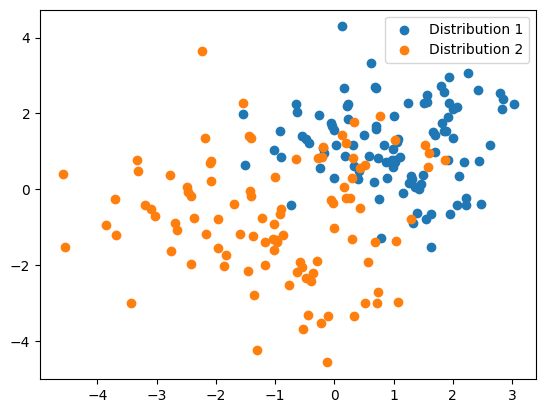

Sinkhorn OT estimation:  2.9731965
Analytical OT estimation:  2.828427
Difference:  0.14476943


(Array(2.828427, dtype=float32), Array(2.9731965, dtype=float32), 0.14476943)

In [ ]:
#2D
# Define parameters
mu1 = jnp.array([1., 1.])
cov1 = jnp.array([[1., 0.], [0., 1.]])
mu2 = jnp.array([-1., -1.])
cov2 = jnp.array([[2., 0.], [0., 2.]])
n_samples = 100

# Sample from multivariate normal distribution
key = random.PRNGKey(0)
X0 = multivariate_normal(key, mean=mu1, cov=cov1, shape=(n_samples,))
Y0 = multivariate_normal(key, mean=mu2, cov=cov2, shape=(n_samples,))

ot_dist = jnp.linalg.norm(mu1 - mu2)


# Plot the two Gaussian distributions
plt.scatter(X0[:, 0], X0[:, 1], label='Distribution 1')
plt.scatter(Y0[:, 0], Y0[:, 1], label='Distribution 2')
plt.legend()
plt.show()

OTT_verbose(X0,Y0,mu1,mu2)

The 3D case:

In [ ]:
#3D

# Set up random number generator
key = jax.random.PRNGKey(0)

# Generate two 3D Gaussian distributions
mu1 = jnp.array([0.0, 0.0, 0.0])
cov1 = jnp.array([[1.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 3.0]])
X0 = multivariate_normal(key, mu1, cov1, shape=(1000,))

mu2 = jnp.array([3.0, 3.0, 3.0])
cov2 = jnp.array([[2.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
Y0 = multivariate_normal(key, mu2, cov2, shape=(1000,))

mu3 = jnp.array([1.0, 1.0, 1.0])
cov3 = jnp.array([[1.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 3.0]])
Z0 = multivariate_normal(key, mu3, cov3, shape=(1000,))
OTT_verbose(X0,Y0,mu1,mu2)

Sinkhorn OT estimation:  5.619646
Analytical OT estimation:  5.196152
Difference:  0.42349386


(Array(5.196152, dtype=float32), Array(5.619646, dtype=float32), 0.42349386)

Downloading and unzipping the dataset and the checkpoint

In [ ]:
!gdown 1eWAT9G0WchXohYahPMFBSJzgASm1yn8y #data_test
!gdown 1IitJH2UqjTb5oa1_46cskNxcQrvVIsfB #data_test2
!gdown 1wo87o6Xl4ZmhYv1GbjkLWI14Feu-MGX3 #data_train
!gdown 1Pg1syIZ_fUVQJ7G2cKxhWGqJ2HeyBflh #checkpoint

Downloading...
From: https://drive.google.com/uc?id=1eWAT9G0WchXohYahPMFBSJzgASm1yn8y
To: /content/OTT_Data_test.zip
100% 356k/356k [00:00<00:00, 55.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IitJH2UqjTb5oa1_46cskNxcQrvVIsfB
To: /content/OTT_Data_test2.zip
100% 427k/427k [00:00<00:00, 196MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wo87o6Xl4ZmhYv1GbjkLWI14Feu-MGX3
To: /content/OTT_Data_train.zip
100% 3.85M/3.85M [00:00<00:00, 185MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Pg1syIZ_fUVQJ7G2cKxhWGqJ2HeyBflh
To: /content/netD.pth
100% 11.1M/11.1M [00:00<00:00, 26.0MB/s]


In [ ]:
!unzip OTT_Data_test.zip
!unzip OTT_Data_test2.zip
!unzip OTT_Data_train.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: OTT_Data_train/X/image_3529.png  
  inflating: OTT_Data_train/X/image_3524.png  
  inflating: OTT_Data_train/X/image_3528.png  
  inflating: OTT_Data_train/X/image_3525.png  
  inflating: OTT_Data_train/X/image_3898.png  
  inflating: OTT_Data_train/X/image_3522.png  
  inflating: OTT_Data_train/X/image_3520.png  
  inflating: OTT_Data_train/X/image_3896.png  
  inflating: OTT_Data_train/X/image_3516.png  
  inflating: OTT_Data_train/X/image_3517.png  
  inflating: OTT_Data_train/X/image_3513.png  
  inflating: OTT_Data_train/X/image_3510.png  
  inflating: OTT_Data_train/X/image_3890.png  
  inflating: OTT_Data_train/X/image_3889.png  
  inflating: OTT_Data_train/X/image_3891.png  
  inflating: OTT_Data_train/X/image_3507.png  
  inflating: OTT_Data_train/X/image_3884.png  
  inflating: OTT_Data_train/X/image_3684.png  
  inflating: OTT_Data_train/X/image_3688.png  
  inflating: OTT_Data_train/X

In [ ]:
dataset_test_path="/content/OTT_Data_test/"
dataset_test_path2="/content/OTT_Data_test2/"
dataset_path="/content/OTT_Data_train/"

Defining the critic architecture here

In [ ]:
import torch
import torch.nn as nn
import torch.nn.parallel
class DCGAN_D(nn.Module):
    def __init__(self, isize, nz, nc, ndf, ngpu, n_extra_layers=0):
        super(DCGAN_D, self).__init__()
        self.ngpu = ngpu
        assert isize % 16 == 0, "isize has to be a multiple of 16"

        main = nn.Sequential()
        # input is nc x isize x isize
        main.add_module('initial:{0}-{1}:conv'.format(nc, ndf),
                        nn.Conv2d(nc, ndf, 4, 2, 1, bias=False))
        main.add_module('initial:{0}:relu'.format(ndf),
                        nn.LeakyReLU(0.2, inplace=True))
        csize, cndf = isize / 2, ndf

        # Extra layers
        for t in range(n_extra_layers):
            main.add_module('extra-layers-{0}:{1}:conv'.format(t, cndf),
                            nn.Conv2d(cndf, cndf, 3, 1, 1, bias=False))
            main.add_module('extra-layers-{0}:{1}:batchnorm'.format(t, cndf),
                            nn.BatchNorm2d(cndf))
            main.add_module('extra-layers-{0}:{1}:relu'.format(t, cndf),
                            nn.LeakyReLU(0.2, inplace=True))

        while csize > 4:
            in_feat = cndf
            out_feat = cndf * 2
            main.add_module('pyramid:{0}-{1}:conv'.format(in_feat, out_feat),
                            nn.Conv2d(in_feat, out_feat, 4, 2, 1, bias=False))
            main.add_module('pyramid:{0}:batchnorm'.format(out_feat),
                            nn.BatchNorm2d(out_feat))
            main.add_module('pyramid:{0}:relu'.format(out_feat),
                            nn.LeakyReLU(0.2, inplace=True))
            cndf = cndf * 2
            csize = csize / 2

        # state size. K x 4 x 4
        main.add_module('final:{0}-{1}:conv'.format(cndf, 1),
                        nn.Conv2d(cndf, 1, 4, 1, 0, bias=False))
        self.main = main


    def forward(self, input):
        if isinstance(input.data, torch.cuda.FloatTensor) and self.ngpu > 1:
            output = nn.parallel.data_parallel(self.main, input, range(self.ngpu))
        else:
            output = self.main(input)

        output = output.mean(0)
        return output.view(1)

In [ ]:
isize=64
nz=100
nc=3
ndf=64
ngpu=1
batchSize=264
def weights_init(m):
        classname = m.__class__.__name__
        if classname.find('Conv') != -1:
            m.weight.data.normal_(0.0, 0.02)
        elif classname.find('BatchNorm') != -1:
            m.weight.data.normal_(1.0, 0.02)
            m.bias.data.fill_(0)

In [ ]:
netD = DCGAN_D(isize, nz, nc, ndf, ngpu)
#checkpoint_path="/content/drive/Mydrive/OTT_checkpoints/samples/netD_epoch_3.pth"
#netD.load_state_dict(torch.load(opt.netD))
netD.apply(weights_init)
netD.load_state_dict(torch.load("/content/netD.pth"))
netD.cuda()
print(netD)

DCGAN_D(
  (main): Sequential(
    (initial:3-64:conv): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (initial:64:relu): LeakyReLU(negative_slope=0.2, inplace=True)
    (pyramid:64-128:conv): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (pyramid:128:batchnorm): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pyramid:128:relu): LeakyReLU(negative_slope=0.2, inplace=True)
    (pyramid:128-256:conv): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (pyramid:256:batchnorm): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pyramid:256:relu): LeakyReLU(negative_slope=0.2, inplace=True)
    (pyramid:256-512:conv): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (pyramid:512:batchnorm): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pyramid

Loading Test data

In [ ]:
#Test datasets
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
#dataset_test_path="/content/drive/MyDrive/OTT_Data_test/"
dataset_test_1 = dset.ImageFolder(root=dataset_test_path,
                                transform=transforms.Compose([
                                    transforms.Resize(isize),
                                    transforms.CenterCrop(isize),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                ]))
#dataset_test_path2="/content/drive/MyDrive/OTT_Data_test2/"
dataset_test_2 = dset.ImageFolder(root=dataset_test_path2,
                                transform=transforms.Compose([
                                    transforms.Resize(isize),
                                    transforms.CenterCrop(isize),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                ]))
# Create SubsetRandomSampler for each label
indices_test_x = torch.where(torch.tensor(dataset_test_1.targets) == 0)[0]
indices_test_y = torch.where(torch.tensor(dataset_test_1.targets) == 1)[0]
indices_test_z = torch.where(torch.tensor(dataset_test_2.targets) == 1)[0]
sampler_test_x = SubsetRandomSampler(indices_test_x)
sampler_test_y = SubsetRandomSampler(indices_test_y)
sampler_test_z = SubsetRandomSampler(indices_test_z)

# Create data loaders for each label
data_loader_test_x = DataLoader(dataset_test_1, batch_size=batchSize, sampler=sampler_test_x)
data_loader_test_y = DataLoader(dataset_test_1, batch_size=batchSize, sampler=sampler_test_y)
data_loader_test_z = DataLoader(dataset_test_2, batch_size=batchSize, sampler=sampler_test_z)

In [ ]:
data_iter_test_x = iter(data_loader_test_x)
data_iter_test_y = iter(data_loader_test_y)
data_iter_test_z = iter(data_loader_test_z)
X = next(data_iter_test_x)

Y = next(data_iter_test_y)
Z = next(data_iter_test_z)


In [ ]:
X, _ = X
Y, _ = Y
Z, _ = Z
X=X.cuda()
Y=Y.cuda()
Z=Z.cuda()

This function returns the unscaled (presumed) wasserstein distance estimate

In [ ]:
from torch.autograd import Variable

def critic_estimate(X,Y,critic):

  input = torch.FloatTensor(batchSize, 3, isize, isize)
  input = input.cuda()
  input.resize_as_(X).copy_(X)
  inputx = Variable(input)
  input = torch.FloatTensor(batchSize, 3, isize, isize)
  input = input.cuda()
  input.resize_as_(Y).copy_(Y)
  inputy = Variable(input)
  x=critic(inputx)
  y=critic(inputy)
  return(torch.norm(x-y).item())

We then calculate the factor Lambda that helps map the output of the critic network to the correct space of the Wasserstein distance

In [ ]:
critic_estimate(X,Y,netD)

1.5744223594665527

In [ ]:
Lambda=OTT_verbose(X0,Y0,mu1,mu2)[0].item()/critic_estimate(X,Y,netD)

Sinkhorn OT estimation:  5.619646
Analytical OT estimation:  5.196152
Difference:  0.42349386


In [ ]:
Lambda

3.300354685000892

We now estimate the Wasserstein distance between X and Z  and check if it seems logical

In [ ]:
print("W(X,Z):\n")
print("analytical: ",OTT_verbose(X0,Z0,mu1,mu3)[0],"\n")
print("scaled network critic estimate: ",critic_estimate(Z,X,netD)*Lambda)

W(X,Z):

Sinkhorn OT estimation:  2.1343215
Analytical OT estimation:  1.7320508
Difference:  0.40227067
analytical:  1.7320508 

scaled network critic estimate:  0.18677579532287966


It doesnt work..

Although this method seemed logical on a first sight, it didn't work at all, im unable to show if the critic does in fact correctly estimate the wasserstein distance.


In [ ]:
critic_estimate(X,Z,netD)

0.05659264326095581

# other useful bits of code

Generating synthetic data

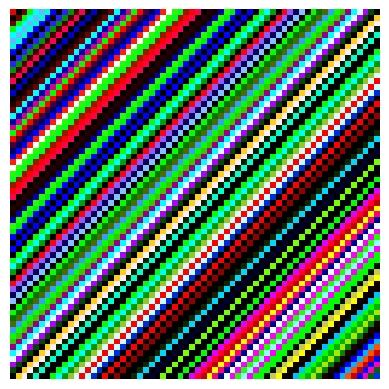

(<matplotlib.image.AxesImage at 0x7f64c260bd90>,
 (-0.5, 63.5, 63.5, -0.5),
 None)

In [ ]:
#3D
from jax import random, numpy as jnp
import imageio
from tqdm import tqdm
import jax
from jax.random import multivariate_normal
n = 1
height = 64
width = 64

mu = jnp.array([0.0, 0.0, 0.0])
cov = jnp.array([[1.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 3.0]])


key = random.PRNGKey(0)
rng = jax.random.split(key, n)
for i in range(n):
    image = jnp.zeros((height, width, 3))
    pixels = multivariate_normal(rng[i], mean=mu, cov=cov,shape=(height*width,))
    for h in range(height):
        for w in range(width):

            pixel = pixels[h+w]
            image = image.at[h, w, 0].set(pixel[0])
            image = image.at[h, w, 1].set(pixel[1])
            image = image.at[h, w, 2].set(pixel[2])
    image = (255*image).astype(jnp.uint8)
    filename = f'image_{i}.png'
    imageio.imwrite(filename, image)

import matplotlib.pyplot as plt
plt.imshow(image), plt.axis('off'), plt.show()

Loading Train data

In [ ]:
#Train datasets
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

#dataset_path="/content/drive/MyDrive/OTT_Data_train/"
dataset = dset.ImageFolder(root=dataset_path,
                                transform=transforms.Compose([
                                    transforms.Resize(isize),
                                    transforms.CenterCrop(isize),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                ]))
# Create SubsetRandomSampler for each label
indices_x = torch.where(torch.tensor(dataset.targets) == 0)[0]
indices_y = torch.where(torch.tensor(dataset.targets) == 1)[0]
sampler_x = SubsetRandomSampler(indices_x)
sampler_y = SubsetRandomSampler(indices_y)

# Create data loaders for each label
data_loader_x = DataLoader(dataset, batch_size=batchSize, sampler=sampler_x)
data_loader_y = DataLoader(dataset, batch_size=batchSize, sampler=sampler_y)



Training script

In [ ]:
from torch.autograd import Variable
import torch.optim as optim
one = torch.FloatTensor([1])
mone = one * -1
one, mone = one.cuda(), mone.cuda()
niter=2
lrD=0.00005
optimizerD = optim.RMSprop(netD.parameters(), lr = lrD)
input = torch.FloatTensor(batchSize, 3, isize, isize)
input = input.cuda()
for epoch in range(niter):
        data_iter_x = iter(data_loader_x)
        data_iter_y = iter(data_loader_y)
        i = 0
        while i < len(data_iter_x):
          for p in netD.parameters(): # reset requires_grad
                p.requires_grad = True
          # clamp parameters to a cube
          for p in netD.parameters():
                p.data.clamp_(-0.01, 0.01)
          data_x = next(data_iter_x)
          data_y = next(data_iter_y)
          i += 1

          # train with real
          real_cpu, _ = data_x
          fake_cpu, _ = data_y
          netD.zero_grad()
          batch_size = real_cpu.size(0)


          real_cpu = real_cpu.cuda()
          fake_cpu = fake_cpu.cuda()
          input.resize_as_(real_cpu).copy_(real_cpu)
          inputv = Variable(input)

          errD_real = netD(inputv)
          errD_real.backward(one)

          # train with fake
          input.resize_as_(fake_cpu).copy_(fake_cpu)
          inputv = Variable(input)
          errD_fake = netD(inputv)
          errD_fake.backward(mone)
          errD = errD_real - errD_fake
          optimizerD.step()
          print('[%d/%d][%d/%d] Loss_D: %f Loss_D_real: %f Loss_D_fake %f'
                % (epoch, niter, i, len(data_loader_x),
                errD.data[0], errD_real.data[0], errD_fake.data[0]))


[0/2][1/12] Loss_D: -1.558850 Loss_D_real: -0.806397 Loss_D_fake 0.752453
[0/2][2/12] Loss_D: -1.458985 Loss_D_real: -0.779915 Loss_D_fake 0.679070
[0/2][3/12] Loss_D: -1.548643 Loss_D_real: -0.801860 Loss_D_fake 0.746782
[0/2][4/12] Loss_D: -1.548833 Loss_D_real: -0.801893 Loss_D_fake 0.746939
[0/2][5/12] Loss_D: -1.554497 Loss_D_real: -0.804146 Loss_D_fake 0.750352
[0/2][6/12] Loss_D: -1.556185 Loss_D_real: -0.805299 Loss_D_fake 0.750886
[0/2][7/12] Loss_D: -1.556673 Loss_D_real: -0.805244 Loss_D_fake 0.751429
[0/2][8/12] Loss_D: -1.556669 Loss_D_real: -0.805307 Loss_D_fake 0.751362
[0/2][9/12] Loss_D: -1.557191 Loss_D_real: -0.805468 Loss_D_fake 0.751723
[0/2][10/12] Loss_D: -1.557120 Loss_D_real: -0.805552 Loss_D_fake 0.751567
[0/2][11/12] Loss_D: -1.557576 Loss_D_real: -0.805695 Loss_D_fake 0.751881
[0/2][12/12] Loss_D: -1.557323 Loss_D_real: -0.805721 Loss_D_fake 0.751602
[1/2][1/12] Loss_D: -1.557650 Loss_D_real: -0.805820 Loss_D_fake 0.751831
[1/2][2/12] Loss_D: -1.556882 Loss_

In [ ]:
torch.save(netD.state_dict(), 'netD.pth')